In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.autograd import Variable
import utils

In [2]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [3]:
train_loader = utils.loader(True)
test_loader = utils.loader(False)

In [4]:
class Net(nn.Module):
    def __init__(self, drop=False):
        super(Net, self).__init__()
        self.drop = drop
        self.conv1 = nn.Conv2d(1, 16, 3)
        self.conv2 = nn.Conv2d(16, 32, 3)
        self.conv3 = nn.Conv2d(32, 32, 3)
        self.droplayer = nn.Dropout2d()
        self.fc = nn.Linear(288, 10)

        self._loss = F.nll_loss
        
    def forward(self, x):
        self.h1 = F.relu(F.max_pool2d(self.conv1(x), 2))
        self.h2 = F.relu(F.max_pool2d(self.conv2(self.h1), 2))
        self.h3 = F.relu(self.conv3(self.h2))
        if self.drop:
            self.flat = self.droplayer(self.h3).view(-1, 288)
        else:
            self.flat = self.h3.view(-1, 288)
        
        self.out = F.log_softmax(self.fc(self.flat), 1)
        return self.out
    
    def loss(self, x, target, **kwargs):
        return self._loss(x, target, **kwargs)

In [5]:
model = Net(True)
optimizer = optim.Adam(model.parameters(), lr=0.01)

In [6]:
def train(epoch):
    model.train()
    for batch_idx, (data, target) in enumerate(train_loader):
        data, target = Variable(data), Variable(target)
        optimizer.zero_grad()
        output = model(data)
        loss = model.loss(output, target)
        loss.backward()
        optimizer.step()
        if batch_idx % 200 == 0:
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                epoch, batch_idx * len(data), len(train_loader.dataset),
                100. * batch_idx / len(train_loader), loss.data[0]))
    else:
        print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
            epoch, batch_idx * len(data), len(train_loader.dataset),
            100. * batch_idx / len(train_loader), loss.data[0]))

In [7]:
def test(log=None):
    model.eval()
    test_loss = 0
    test_correct = 0
    for data, target in test_loader:
        data, target = Variable(data, volatile=True), Variable(target)
        output = model(data)
        test_loss += model.loss(output, target, size_average=False).data[0] # sum up batch loss
        pred = output.data.max(1, keepdim=True)[1] # get the index of the max log-probability
        test_correct += pred.eq(target.data.view_as(pred)).sum()
    test_loss /= len(test_loader.dataset)
    test_correct_percent = 100. * test_correct / len(test_loader.dataset)
    
    train_loss = 0
    train_correct = 0
    for data, target in train_loader:
        data, target = Variable(data, volatile=True), Variable(target)
        output = model(data)
        train_loss += model.loss(output, target, size_average=False).data[0] # sum up batch loss
        pred = output.data.max(1, keepdim=True)[1] # get the index of the max log-probability
        train_correct += pred.eq(target.data.view_as(pred)).sum()
    train_loss /= len(train_loader.dataset)
    train_correct_percent = 100. * train_correct / len(train_loader.dataset)
    
    print('\nTest set:  Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)'.format(
        test_loss, test_correct, len(test_loader.dataset), test_correct_percent))
    print('Train set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
        train_loss, train_correct, len(train_loader.dataset), train_correct_percent))
    
    log['test'].append((test_loss, test_correct_percent))
    log['train'].append((train_loss, train_correct_percent))

In [8]:
err_log = {'test': [], 'train': []}

In [9]:
for epoch in range(1, 21):
    train(epoch)
    test(err_log)

Train Epoch: 1 [0/60000 (0%)]	Loss: 2.328949
Train Epoch: 1 [10000/60000 (17%)]	Loss: 0.340910
Train Epoch: 1 [20000/60000 (33%)]	Loss: 0.166279
Train Epoch: 1 [30000/60000 (50%)]	Loss: 0.107647
Train Epoch: 1 [40000/60000 (67%)]	Loss: 0.138857
Train Epoch: 1 [50000/60000 (83%)]	Loss: 0.371545
Train Epoch: 1 [59950/60000 (100%)]	Loss: 0.279325

Test set:  Average loss: 0.1062, Accuracy: 9690/10000 (97%)
Train set: Average loss: 0.1066, Accuracy: 58167/60000 (97%)

Train Epoch: 2 [0/60000 (0%)]	Loss: 0.053325
Train Epoch: 2 [10000/60000 (17%)]	Loss: 0.162974
Train Epoch: 2 [20000/60000 (33%)]	Loss: 0.035739
Train Epoch: 2 [30000/60000 (50%)]	Loss: 0.167324
Train Epoch: 2 [40000/60000 (67%)]	Loss: 0.124793
Train Epoch: 2 [50000/60000 (83%)]	Loss: 0.343876
Train Epoch: 2 [59950/60000 (100%)]	Loss: 0.072323

Test set:  Average loss: 0.0862, Accuracy: 9740/10000 (97%)
Train set: Average loss: 0.0933, Accuracy: 58282/60000 (97%)

Train Epoch: 3 [0/60000 (0%)]	Loss: 0.119275
Train Epoch: 3 [1

Train Epoch: 18 [40000/60000 (67%)]	Loss: 0.144847
Train Epoch: 18 [50000/60000 (83%)]	Loss: 0.299614
Train Epoch: 18 [59950/60000 (100%)]	Loss: 0.073404

Test set:  Average loss: 0.0901, Accuracy: 9728/10000 (97%)
Train set: Average loss: 0.0882, Accuracy: 58369/60000 (97%)

Train Epoch: 19 [0/60000 (0%)]	Loss: 0.179882
Train Epoch: 19 [10000/60000 (17%)]	Loss: 0.247437
Train Epoch: 19 [20000/60000 (33%)]	Loss: 0.273014
Train Epoch: 19 [30000/60000 (50%)]	Loss: 0.158876
Train Epoch: 19 [40000/60000 (67%)]	Loss: 0.385340
Train Epoch: 19 [50000/60000 (83%)]	Loss: 0.522653
Train Epoch: 19 [59950/60000 (100%)]	Loss: 0.054286

Test set:  Average loss: 0.1049, Accuracy: 9729/10000 (97%)
Train set: Average loss: 0.1030, Accuracy: 58265/60000 (97%)

Train Epoch: 20 [0/60000 (0%)]	Loss: 0.185737
Train Epoch: 20 [10000/60000 (17%)]	Loss: 0.151983
Train Epoch: 20 [20000/60000 (33%)]	Loss: 0.141074
Train Epoch: 20 [30000/60000 (50%)]	Loss: 0.327062
Train Epoch: 20 [40000/60000 (67%)]	Loss: 0.3106

In [9]:
train_log = [z for z in zip(*err_log['train'])]
test_log = [z for z in zip(*err_log['test'])]

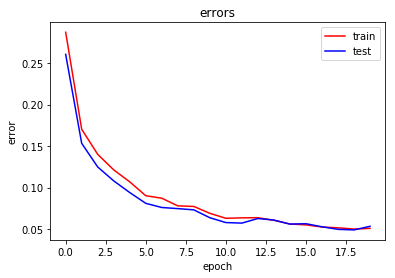

In [12]:
train_handler, = plt.plot(range(20), train_log[0], color='r', label='train')
test_handler, = plt.plot(range(20), test_log[0], color='b', label='test')
plt.title('errors')
plt.xlabel('epoch')
plt.ylabel('error')
plt.legend(handles=[train_handler, test_handler])
plt.show()